In [1]:
#Import Library 
import keras
from keras.datasets import fashion_mnist 
#from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
#from keras.models import Sequential
#from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

In [2]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape[1]

28

In [4]:
#Reshapeing X to a 2D array
X = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2])
X.shape

(60000, 784)

In [5]:
#Sanity check
y = y_train
y.shape

(60000,)

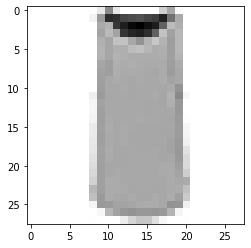

0

In [6]:
#Visualise an image 
n= 2
plt.imshow(X[n].reshape(28, 28), cmap = plt.cm.binary)
plt.show()
y[n]

In [7]:
#PCA
Clus_dataSet = StandardScaler().fit_transform(X) #(mean = 0 and variance = 1)

In [8]:
from sklearn.decomposition import PCA
# Make an instance of the Model
variance = 0.98
pca = PCA(variance)

In [9]:
pca.fit(Clus_dataSet)

PCA(copy=True, iterated_power='auto', n_components=0.98, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pca.n_components_

420

In [11]:
Clus_dataSet = pca.transform(Clus_dataSet)

In [12]:
Clus_dataSet.shape

(60000, 420)

In [13]:
approximation = pca.inverse_transform(Clus_dataSet)
approximation.shape

(60000, 784)

3


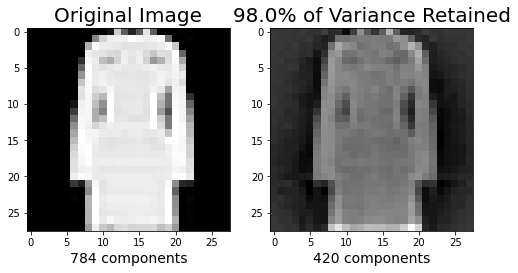

In [14]:
#image reconstruction using the less dimensioned data
plt.figure(figsize=(8,4));

n = 500 #index value

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(X[n].reshape(X_train.shape[1], X_train.shape[2]),
              cmap = plt.cm.gray,);
plt.xlabel(str(X.shape[1])+' components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 196 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[n].reshape(X_train.shape[1], X_train.shape[2]),
              cmap = plt.cm.gray,);
plt.xlabel(str(Clus_dataSet.shape[1]) +' components', fontsize = 14)
plt.title(str(variance * 100) + '% of Variance Retained', fontsize = 20);

print(y_train[n])

In [15]:
# #tocheck for best K_means cluster number
#inertia = []
#for k in range(1, 20):
  #kmeans = KMeans(init = "k-means++", n_clusters=k, random_state=1).fit(Clus_dataSet)
  #inertia.append(np.sqrt(kmeans.inertia_))

In [16]:
#plt.plot(range(1, 20), inertia, marker='s');
#plt.xlabel('$k$')
#plt.ylabel('$J(C_k)$');

In [17]:
# #to check for best n_init with k = 5
# inertia = []
# for k in range(5, 100):
#     kmeans = KMeans(init = "k-means++",n_clusters=5, n_init = k,random_state=1).fit(Clus_dataSet)
#     inertia.append(np.sqrt(kmeans.inertia_))

In [18]:
# plt.plot(range(5, 100), inertia, marker='s');
# plt.xlabel('$k$')
# plt.ylabel('$J(C_k)$');

In [19]:
k_means = KMeans(init = "k-means++", n_clusters = 10, n_init = 35)

In [20]:
k_means.fit(Clus_dataSet)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=35, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
k_means_labels = k_means.labels_

In [22]:
G = len(np.unique(k_means_labels)) #Number of labels
#Hitech 2D matrix  for an array of indexes of the given label
cluster_index= [[] for i in range(G)]
for i, label in enumerate(k_means_labels,0):
    for n in range(G):
        if label == n:
            cluster_index[n].append(i)
        else:
            continue   

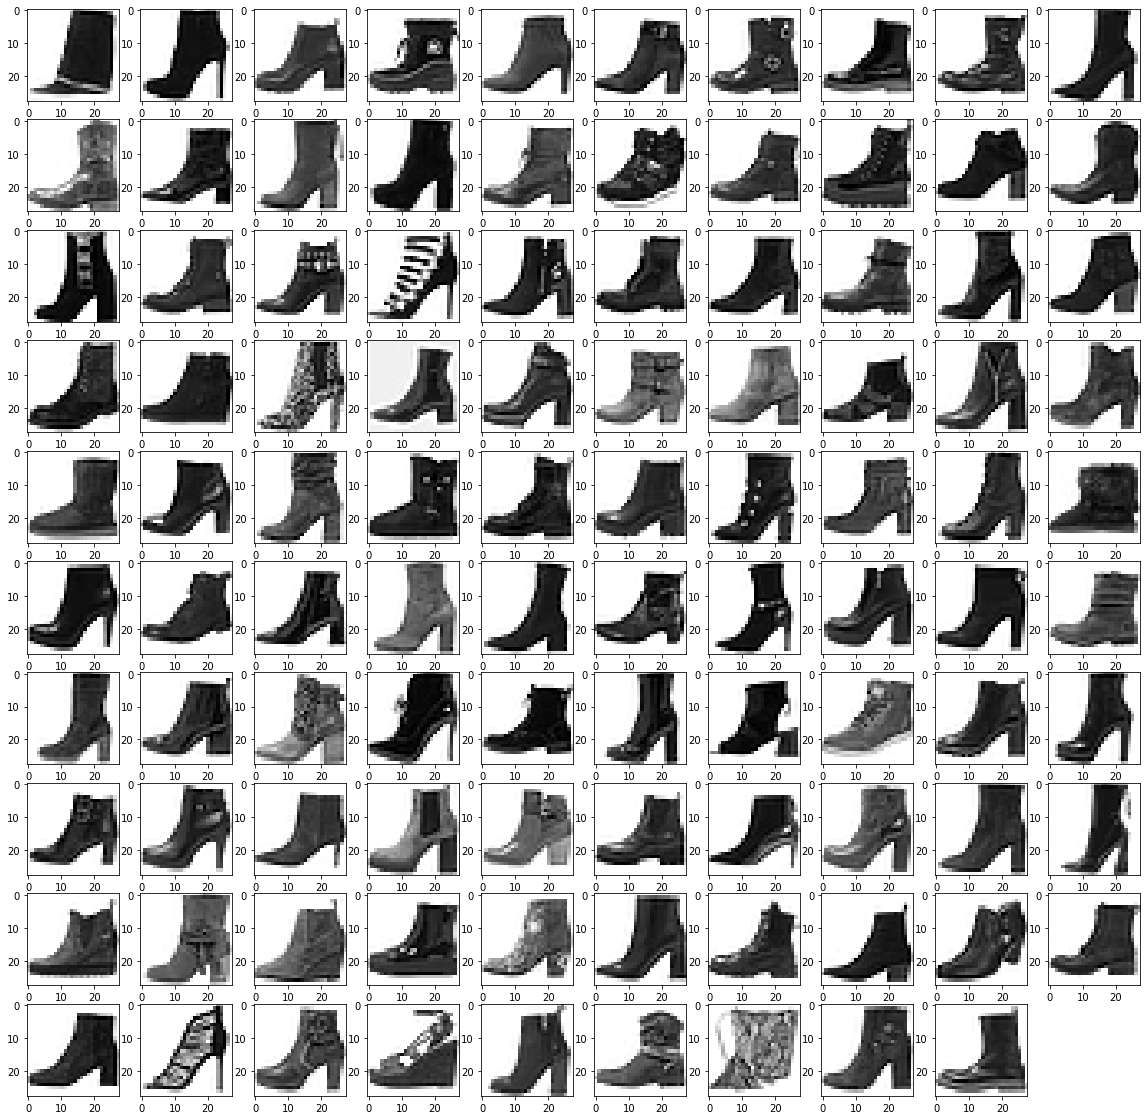

In [23]:
#Visualisation for clusters = clust
plt.figure(figsize=(20,20));
clust = 9
for i in range(1,100):
    plt.subplot(10, 10, i); #(Number of rows, Number of column per row, item number)
    plt.imshow(X[cluster_index[clust][i+500]].reshape(X_train.shape[1], X_train.shape[2]), cmap = plt.cm.binary);
    
plt.show()

In [24]:
Y_clust = [[] for i in range(G)]
for n in range(G):
    Y_clust[n]=y[cluster_index[n]] #Y_clust[0] contains array of answers for the cluster_index[0]
    assert(len(Y_clust[n])==len(cluster_index[n]))
#Y_0 = y_train[cluster0_index]

In [25]:
#counts the number of each category in each cluster
def counter(cluster):
    unique, counts = np.unique(cluster, return_counts=True)
    label_index = dict(zip(unique, counts))
    return label_index

In [26]:
label_count= [[] for i in range(G)]
for n in range(G):
    label_count[n] = counter(Y_clust[n])

label_count[1] #Number of items of a certain type in cluster 1

{0: 525,
 1: 150,
 2: 496,
 3: 496,
 4: 254,
 5: 3904,
 6: 756,
 7: 567,
 8: 400,
 9: 162}

In [27]:
class_names = {0:'T-shirt/top', 1:'Trouser',2: 'Pullover',3: 'Dress',4: 'Coat',5:
               'Sandal',6: 'Shirt', 7:'Sneaker',8:  'Bag',9: 'Ankle boot'}

def plotter(label_dict):
    plt.bar(range(len(label_dict)), list(label_dict.values()), align='center')
    a = []
    for i in [*label_dict]: a.append(class_names[i])
    plt.xticks(range(len(label_dict)), list(a), rotation=45, rotation_mode='anchor')

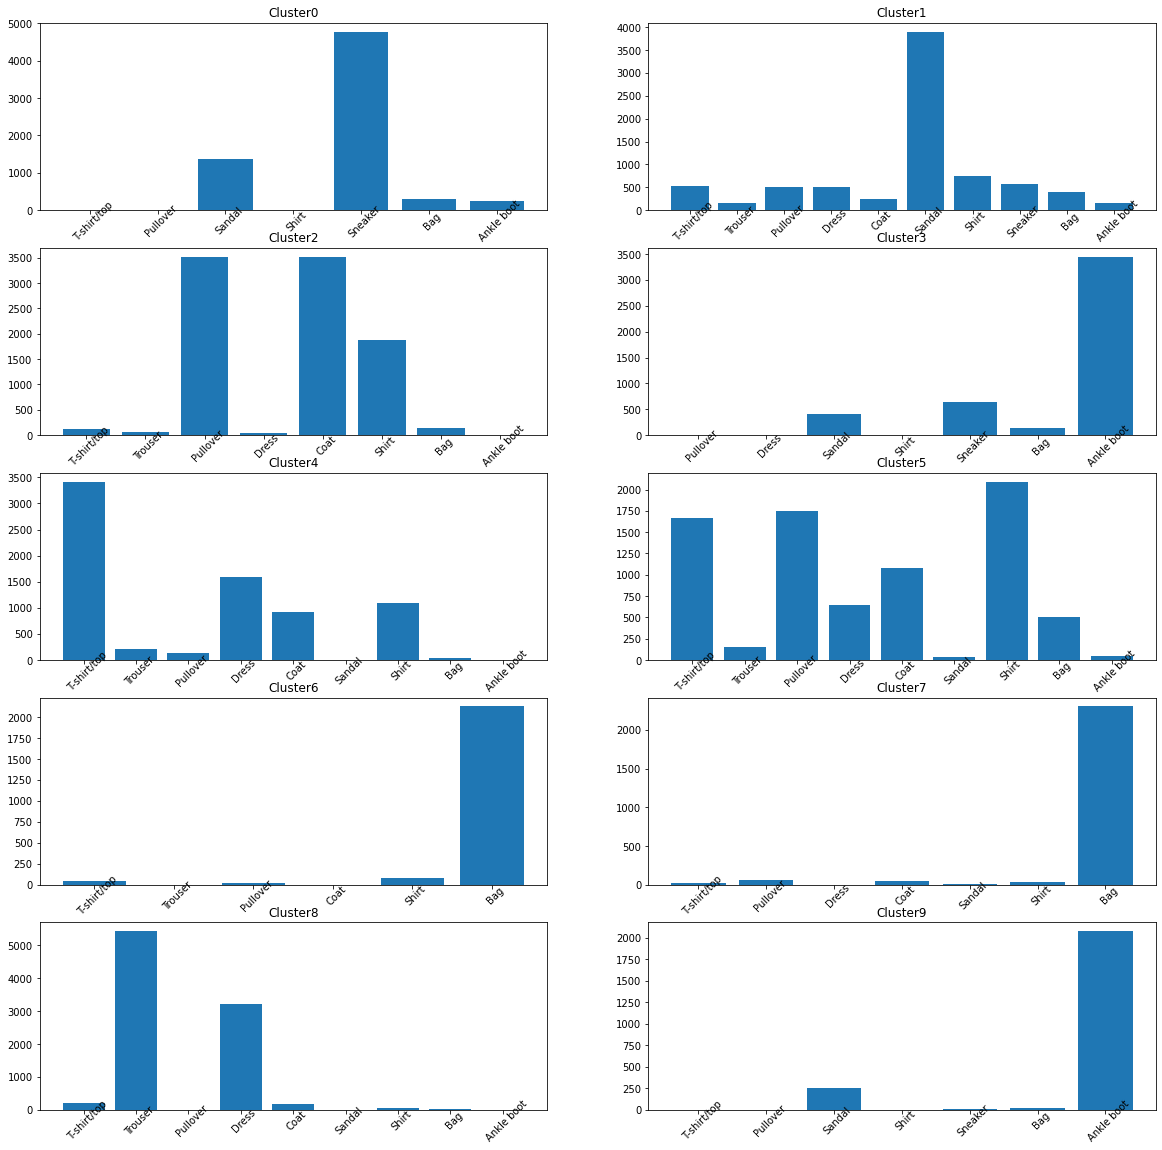

In [28]:
plt.figure(figsize=(20,20))
for i in range (1,11):
    plt.subplot(5, 2, i)
    plotter(label_count[i-1]) 
    plt.title("Cluster" + str(i-1))

In [29]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-1.64730150e+01,  4.54752490e+00,  2.03170066e-01, ...,
         2.04562668e-03,  1.14488086e-03,  9.20136277e-04],
       [-1.67902536e+01, -3.12844795e+00,  4.94248370e+00, ...,
        -2.67303431e-03, -1.75295962e-03,  1.69803892e-03],
       [ 1.76991397e+01,  5.03440048e+00,  6.31702946e+00, ...,
        -2.84760171e-03, -1.20855830e-03,  1.42997619e-03],
       ...,
       [ 3.77815627e+00,  1.04898071e+01,  2.43419825e+00, ...,
         6.26668601e-03,  3.17043495e-04, -4.39912656e-03],
       [ 1.69422080e-01, -1.46755523e+01, -6.44366312e+00, ...,
        -1.89269881e-03,  4.33625381e-03,  8.99605804e-05],
       [ 4.28842359e-01,  1.45194472e+01, -9.86055923e+00, ...,
         2.68477825e-03,  9.26076897e-03,  1.68389333e-03]])

In [30]:
k_means_labels

array([3, 4, 1, ..., 8, 1, 1], dtype=int32)

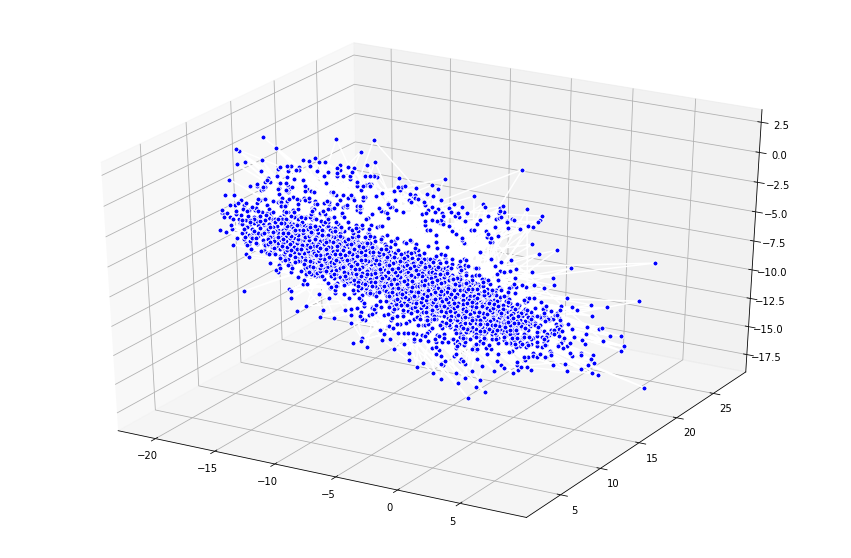

In [31]:
#cluster visualisation
my_members = (k_means_labels == 3) #Enter Cluster number
my_members.shape
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1,projection='3d')
#Clus_dataSet.shape
#Clus_dataSet[my_members,300].shape
ax.plot(Clus_dataSet[my_members, 0], Clus_dataSet[my_members,1],Clus_dataSet[my_members,2], 'w', markerfacecolor="blue", marker='.',markersize=10)